# Let's play with the embeddings here a bit

We will have a look at Bert embeddings here first. 

In [87]:
import torch
import pickle 
import pandas as pd
import numpy as np
from transformers import DistilBertTokenizerFast, DistilBertModel

Loading the embeddings from file. <br>
The ones I'm working on here are the result of processing of only 500 randomly sampled documents, filtering out words that are not nouns, and only keeping vectors that have a similarity below 0.9. 

In [4]:
vocab_output_path = "vocab_etm"
embedding_output_path = "embedding_etm"
new_collection_output_path = "new_collection_etm"

In [5]:
# Loading from binary 
with open(vocab_output_path, "rb") as fp:  
    idx2word = pickle.load(fp)
with open(embedding_output_path, "rb") as fp: 
    embedding = pickle.load(fp)
with open(new_collection_output_path, "rb") as fp: 
    new_token_ids = pickle.load(fp)

In [25]:
word2idxs = [(word, [position for position, v in enumerate(list(idx2word.values())) if v == word]) for word in set(idx2word.values())]

In [26]:
word2idxs_df = pd.DataFrame(word2idxs, columns=["word","indices"])

In [29]:
word2idxs_df.head(10)

,word,indices
0,paul,"[9107, 9563, 9587, 16636]"
1,cloud,"[685, 6243, 6273, 12015, 17928, 17949, 18372, ..."
2,ray,"[2137, 2514, 3615, 10956, 19909, 19914, 19943,..."
3,mirror,"[9528, 9541, 9556, 12854, 18109, 18116]"
4,amsterdam,[9898]
5,way,"[768, 7556, 8266, 8400, 9004, 9434, 9723, 9979..."
6,maker,"[10326, 18314]"
7,distortion,"[5989, 12095, 17133]"
8,campus,"[3292, 11403]"
9,spirit,"[15896, 16413]"


In [34]:
word2idxs_df["num_occurrences"] = word2idxs_df["indices"].apply(lambda x: len(x))
word2idxs_df.head()

,word,indices,num_occurrences
0,paul,"[9107, 9563, 9587, 16636]",4
1,cloud,"[685, 6243, 6273, 12015, 17928, 17949, 18372, ...",12
2,ray,"[2137, 2514, 3615, 10956, 19909, 19914, 19943,...",9
3,mirror,"[9528, 9541, 9556, 12854, 18109, 18116]",6
4,amsterdam,[9898],1


In [128]:
word2idxs_sorted = word2idxs_df.sort_values(by=["num_occurrences"],ascending=False)
word2idxs_sorted.head(20)

,word,indices,num_occurrences
255,data,"[678, 1026, 1030, 1361, 1703, 2068, 2374, 2380...",236
312,system,"[25, 593, 673, 762, 1686, 2572, 2574, 2593, 28...",195
1974,model,"[20, 214, 278, 310, 318, 329, 575, 585, 589, 6...",188
891,paper,"[365, 506, 563, 751, 756, 981, 1010, 1043, 156...",187
107,time,"[118, 145, 165, 191, 472, 499, 529, 556, 954, ...",172
862,energy,"[2, 12, 14, 319, 327, 339, 345, 349, 355, 363,...",142
1767,two,"[16, 21, 77, 233, 275, 281, 428, 579, 698, 708...",139
1729,design,"[0, 5, 7, 24, 41, 47, 490, 547, 758, 770, 1691...",138
1567,high,"[44, 485, 542, 988, 1699, 1974, 1981, 2007, 20...",129
1378,control,"[93, 501, 558, 1911, 2865, 2881, 3035, 3360, 3...",127


In [133]:
word2idxs_sorted.tail(20)

,word,indices,num_occurrences
1579,documentation,[8774],1
1581,pairing,[5255],1
627,workplace,[12128],1
1588,regression,[3950],1
1589,midst,[14799],1
1591,narrative,[8348],1
1596,outreach,[9182],1
1597,realism,[17882],1
1602,disorder,[14794],1
600,pen,[1568],1


In [174]:
word2idxs_sorted.iloc[297]

word                                                           light
indices            [312, 4068, 4072, 4095, 11201, 13148, 13433, 1...
num_occurrences                                                   16
Name: 1733, dtype: object

### And since we all like it, let's add some visualisation to it! 

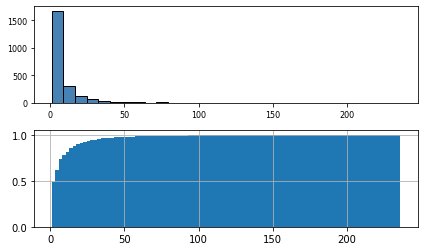

In [124]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
plt.subplot(2, 1, 1)
word2idxs_df["num_occurrences"].hist(bins=30,color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)   
plt.subplot(2, 1, 2)
word2idxs_df["num_occurrences"].hist(bins=100, density=True, cumulative=True, linewidth=1.0)   
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

In [38]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Let's select one of the higly contextualised words to visualise

In [54]:
# all the embeddings for the word 'data'
data_emb = embedding[list(word2idxs_df[word2idxs_df["word"]=="data"]["indices"])[0],:].numpy()

In [78]:
data_emb_df = pd.DataFrame(data_emb)
data_emb_df["word"] = 0
data_emb_df.head() # each row is a different "meaning" of data

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,word
0,-0.018001,0.060051,0.910548,-0.870742,0.103921,-0.401897,-1.376223,-0.896121,0.286917,-1.423795,...,-0.306901,0.883747,1.502679,1.616564,-1.284128,-2.582913,1.365572,1.425602,-0.302300,0
1,-0.299309,0.799008,0.778006,1.376404,-0.222688,0.093452,0.052435,-1.437499,0.043525,-0.681219,...,0.267439,0.986709,0.558490,0.416115,1.306738,-1.823482,-0.402632,-0.881468,-0.447911,0
2,1.431058,1.042795,-0.850334,0.168460,-0.210625,-0.234734,-0.226439,-1.812011,-0.199305,0.722324,...,-1.286011,-1.776121,-0.157667,1.876553,0.303206,-2.954412,0.742170,0.515035,-0.284596,0
3,2.057877,0.451977,-0.586115,-0.202493,0.898100,-0.161593,-1.187881,-0.734531,-1.905288,0.284683,...,-0.213969,1.147992,0.316934,0.663863,-1.233426,0.061373,-0.909051,0.324791,1.003575,0
4,2.277482,2.398608,-0.343539,-2.268682,0.179678,-0.331500,-1.508321,0.687729,-1.126624,0.925618,...,1.254274,-0.394768,-1.562023,1.578879,-1.185822,0.464804,-0.321636,0.297967,-1.287210,0


In [176]:
# all the embeddings for the word 'system', 'model', 'wave', 'user', 'light'
system_emb = embedding[list(word2idxs_df[word2idxs_df["word"]=="system"]["indices"])[0],:].numpy()
model_emb = embedding[list(word2idxs_df[word2idxs_df["word"]=="model"]["indices"])[0],:].numpy()
wave_emb = embedding[list(word2idxs_df[word2idxs_df["word"]=="wave"]["indices"])[0],:].numpy()
user_emb = embedding[list(word2idxs_df[word2idxs_df["word"]=="user"]["indices"])[0],:].numpy()
light_emb = embedding[list(word2idxs_df[word2idxs_df["word"]=="light"]["indices"])[0],:].numpy()
# and their respective dataframes 
system_emb_df = pd.DataFrame(system_emb)
system_emb_df["word"] = 1
model_emb_df = pd.DataFrame(model_emb)
model_emb_df["word"] = 2
wave_emb_df = pd.DataFrame(wave_emb)
wave_emb_df["word"] = 3
user_emb_df = pd.DataFrame(user_emb)
user_emb_df["word"] = 4
light_emb_df = pd.DataFrame(light_emb)
light_emb_df["word"] = 5

In [205]:
# now stacking all of them 
frequent_words_df = data_emb_df.append([system_emb_df,model_emb_df,wave_emb_df,user_emb_df,light_emb_df])

In [178]:
frequent_words_df.dropna()

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,word
0,-0.018001,0.060051,0.910548,-0.870742,0.103921,-0.401897,-1.376223,-0.896121,0.286917,-1.423795,...,-0.306901,0.883747,1.502679,1.616564,-1.284128,-2.582913,1.365572,1.425602,-0.302300,0
1,-0.299309,0.799008,0.778006,1.376404,-0.222688,0.093452,0.052435,-1.437499,0.043525,-0.681219,...,0.267439,0.986709,0.558490,0.416115,1.306738,-1.823482,-0.402632,-0.881468,-0.447911,0
2,1.431058,1.042795,-0.850334,0.168460,-0.210625,-0.234734,-0.226439,-1.812011,-0.199305,0.722324,...,-1.286011,-1.776121,-0.157667,1.876553,0.303206,-2.954412,0.742170,0.515035,-0.284596,0
3,2.057877,0.451977,-0.586115,-0.202493,0.898100,-0.161593,-1.187881,-0.734531,-1.905288,0.284683,...,-0.213969,1.147992,0.316934,0.663863,-1.233426,0.061373,-0.909051,0.324791,1.003575,0
4,2.277482,2.398608,-0.343539,-2.268682,0.179678,-0.331500,-1.508321,0.687729,-1.126624,0.925618,...,1.254274,-0.394768,-1.562023,1.578879,-1.185822,0.464804,-0.321636,0.297967,-1.287210,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,3.128657,0.398304,-1.112727,0.649341,0.018984,-0.114765,-0.543710,0.795537,-0.432794,0.640101,...,0.361860,-0.861322,-0.235710,-0.972951,-0.211978,0.029862,-0.621525,0.101167,0.625464,5
12,-0.744646,1.027409,0.273621,-1.491413,-1.609048,1.419578,-0.233956,-0.161111,0.463113,1.476249,...,0.502621,0.907341,-1.412949,-0.299360,-1.822563,2.671861,-0.791216,0.720922,-0.011111,5
13,0.634628,0.357124,0.918707,-0.988865,-0.032684,0.838552,-1.793823,0.567289,-1.111306,0.242394,...,-0.319928,0.392618,-0.856115,-1.857267,1.651446,-1.193650,-0.222598,-0.111935,-2.284863,5
14,0.205155,0.416071,-0.119771,0.885890,-1.022084,-3.203084,1.968190,-1.104935,-0.620717,-1.163332,...,-0.451444,0.222264,1.288059,0.236371,-1.020211,-0.250703,-0.677449,-0.912035,-0.647462,5


In [180]:
# first PCA reduction 
pca = PCA(n_components=3)
pca_result = pca.fit_transform(frequent_words_df.dropna().values)

In [181]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.0381368  0.03481434 0.03184285]


In [230]:
frequent_words_df['pca-one'] = pca_result[:,0]
frequent_words_df['pca-two'] = pca_result[:,1] 
frequent_words_df['pca-three'] = pca_result[:,2]

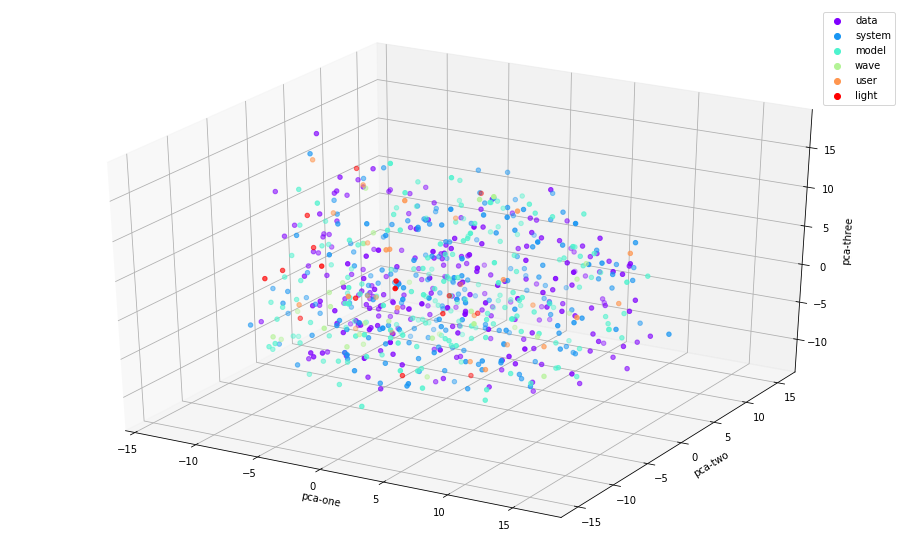

In [203]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
scatter = ax.scatter(
    xs=frequent_words_df["pca-one"], 
    ys=frequent_words_df["pca-two"], 
    zs=frequent_words_df["pca-three"], 
    c = frequent_words_df["word"],
    cmap='rainbow'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.legend(handles=scatter.legend_elements()[0], labels=[ 'wave', 'user', 'light'])

plt.show()

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
scatter = ax.scatter(
    xs=frequent_words_df["pca-one"], 
    ys=frequent_words_df["pca-two"], 
    zs=frequent_words_df["pca-three"], 
    c = frequent_words_df["word"],
    cmap='rainbow'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.legend(handles=scatter.legend_elements()[0], labels=[ 'wave', 'user', 'light'])

plt.show()

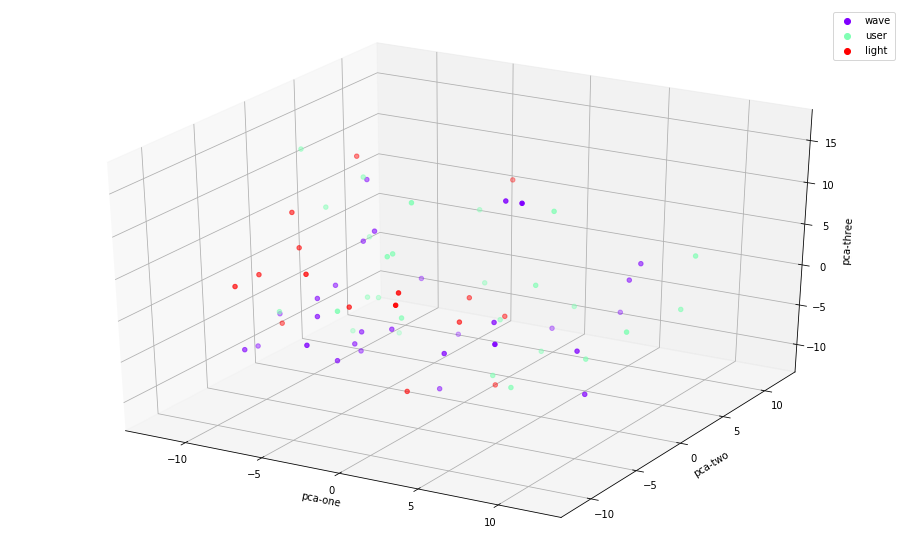

In [232]:
# plotting only the less frequent words 
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
scatter = ax.scatter(
    xs=frequent_words_df[619:]["pca-one"], 
    ys=frequent_words_df[619:]["pca-two"], 
    zs=frequent_words_df[619:]["pca-three"], 
    c = frequent_words_df[619:]["word"],
    cmap='rainbow'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.legend(handles=scatter.legend_elements()[0], labels=[ 'wave', 'user', 'light'])

plt.show()